# OrbitalFish Exploratory Analysis
Author: SomeRandomTV (from ZiaTechnica)

Dataset: NASA Exoplanet

Goals: \
Answer these questions: \
What differs a Candidate planet to a False Positive to Confirmed planet? \
What could cause a False Positive? \
What does a Candidate planet look like? How does it behave? \
What do Candidate Planets have in common with Confirmed? \
What differs Confirmed planets to others?

Basically summed up to: `How can we define a planet from far away?`

Tasks:
1) Build/Train a model to first discriminate between `Candidate` and `False Positive` planets
2) Build/Train another model to further discriminate between `Confirmed` and `Candidate` planets




In [831]:
import pandas as pd
import numpy as np

In [832]:
exoplanets = pd.read_csv('../data/exoplanets.csv')  # load the csv into a dataframe


## Data Exploration

Now that we have the data loaded, let's explore it. \
Some things we need do are:
- Sanity checks
- Encoding categoric data
- Handling Missing values
- Data type conversion
- Duplicate Removal
- Data Visualization I (Understand Raw data)
- Normalizing/scaling data
- Univariate Statistics & Distributions(before and after scaling)
- Data visualization II (Verfiy scaling)
- Outlier Detection & Treatment
- Correlation & Multicollinearity
- Feature–Target Relationships
- Class Imbalance / Target Distribution
- Cardinality & Rare Levels
- Dimensionality Reduction / Clustering Preview
- Feature Engineering Ideation
- Data Leakage Audit
- Sampling & Performance Considerations
- Automated Profiling & Documentation

### 1) Dataframe sanity checks

Here is the kind of order I look at doing
- Dataframe info(Features, types, etc)
- Dataframe Shape
- Null Values (Percentage of them)
- Unique/Number of unique values

After that do this:
- Find/Drop irrelevant cols
- Encode categorical data
- Handle missing values

In [833]:
exoplanets.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [834]:
exoplanets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2359 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [835]:
exoplanets.shape

(9564, 49)

In [836]:
exoplanets.isnull().sum() / 100

kepid                 0.00
kepoi_name            0.00
kepler_name          72.05
koi_disposition       0.00
koi_pdisposition      0.00
koi_score            15.10
koi_fpflag_nt         0.00
koi_fpflag_ss         0.00
koi_fpflag_co         0.00
koi_fpflag_ec         0.00
koi_period            0.00
koi_period_err1       4.54
koi_period_err2       4.54
koi_time0bk           0.00
koi_time0bk_err1      4.54
koi_time0bk_err2      4.54
koi_impact            3.63
koi_impact_err1       4.54
koi_impact_err2       4.54
koi_duration          0.00
koi_duration_err1     4.54
koi_duration_err2     4.54
koi_depth             3.63
koi_depth_err1        4.54
koi_depth_err2        4.54
koi_prad              3.63
koi_prad_err1         3.63
koi_prad_err2         3.63
koi_teq               3.63
koi_teq_err1         95.64
koi_teq_err2         95.64
koi_insol             3.21
koi_insol_err1        3.21
koi_insol_err2        3.21
koi_model_snr         3.63
koi_tce_plnt_num      3.46
koi_tce_delivname     3.46
k

In [837]:
# find the number of unique values of each feature
exoplanets.nunique()


kepid                8214
kepoi_name           9564
kepler_name          2359
koi_disposition         3
koi_pdisposition        2
koi_score             650
koi_fpflag_nt           3
koi_fpflag_ss           2
koi_fpflag_co           2
koi_fpflag_ec           2
koi_period           9564
koi_period_err1      3506
koi_period_err2      3506
koi_time0bk          9538
koi_time0bk_err1     2530
koi_time0bk_err2     2530
koi_impact           2406
koi_impact_err1      2217
koi_impact_err2      1884
koi_duration         7834
koi_duration_err1    2264
koi_duration_err2    2264
koi_depth            2853
koi_depth_err1       1415
koi_depth_err2       1415
koi_prad             2988
koi_prad_err1        1240
koi_prad_err2        1238
koi_teq              2511
koi_teq_err1            0
koi_teq_err2            0
koi_insol            7801
koi_insol_err1       7130
koi_insol_err2       6560
koi_model_snr        2740
koi_tce_plnt_num        8
koi_tce_delivname       3
koi_steff            2445
koi_steff_er

In [838]:
# get the unique values of each column with > 2 unique features
print(f"koi_disposition: {exoplanets['koi_disposition'].unique()}")
print(f"koi_pdisposition: {exoplanets['koi_pdisposition'].unique()}")
print(f"koi_fpflag_nt: {exoplanets['koi_fpflag_nt'].unique()}")
print(f"koi_tce_plnt_num: {exoplanets['koi_tce_plnt_num'].unique()}")


koi_disposition: ['CONFIRMED' 'CANDIDATE' 'FALSE POSITIVE']
koi_pdisposition: ['CANDIDATE' 'FALSE POSITIVE']
koi_fpflag_nt: [  0   1 465]
koi_tce_plnt_num: [ 1.  2.  3. nan  4.  5.  6.  7.  8.]


#### Sanity checks results

There are:
- 48 features
- Most dtypes are Float64 and some are Int64
- 5 of these features are type `Object`:
  - kepid
  - kepoi_name
  - kepler_name
  - koi_disposition (Encodable)
  - koi_pdisposition (Encodable)
  - koi_tce_delivname
- 2 features have major nulls:
  - kepler_name (72.05%)
  - koi_score (15.10%)
- Unique values:
  - koi_disposition: `'CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'`
  - koi_pdisposition: `'CANDIDATE', 'FALSE POSITIVE'`
  - koi_fpflag_nt: `0, 1, 465`
  - koi_tce_plnt_num: `1, 2, 3, nan, 4, 5, 6, 7, 8`
Dropped some cols such as the names/identifiers, arbitrary time measurements, and of the *_err cols \
These won't really do good for our model

Features marked as (Encodable) can be encoded and kept. \
Others will be dropped. \
Also they happen to be the target variables

Handling of nulls:
- kepler_name will be dropped
- koi_score: will either be filled with means/modes or dropped
- Remaining features with few nulls will be filled with mean values

---

#### Next steps

Columns to be dropped:
- kepid
- kepoi_name  
- kepler_name
- koi_tce_delivname

After dropping these columns:
1. Encode categorical data
2. Handle missing values before visualization


In [839]:
keep = [
    'koi_disposition','koi_pdisposition',
    'koi_period','koi_duration','koi_depth','koi_impact',
    'koi_prad','koi_teq','koi_insol','koi_model_snr',
    'koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec',
    'koi_steff','koi_slogg','koi_srad','koi_kepmag'
]

exoplanets = exoplanets[keep]


In [840]:
exoplanets.head()

,koi_disposition,koi_pdisposition,koi_period,koi_duration,koi_depth,koi_impact,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_steff,koi_slogg,koi_srad,koi_kepmag
0,CONFIRMED,CANDIDATE,9.488036,2.95750,616.0,0.146,2.26,793.0,93.59,35.8,0,0,0,0,5455.0,4.467,0.927,15.347
1,CONFIRMED,CANDIDATE,54.418383,4.50700,875.0,0.586,2.83,443.0,9.11,25.8,0,0,0,0,5455.0,4.467,0.927,15.347
2,CANDIDATE,CANDIDATE,19.899140,1.78220,10800.0,0.969,14.60,638.0,39.30,76.3,0,0,0,0,5853.0,4.544,0.868,15.436
3,FALSE POSITIVE,FALSE POSITIVE,1.736952,2.40641,8080.0,1.276,33.46,1395.0,891.96,505.6,0,1,0,0,5805.0,4.564,0.791,15.597
4,CONFIRMED,CANDIDATE,2.525592,1.65450,603.0,0.701,2.75,1406.0,926.16,40.9,0,0,0,0,6031.0,4.438,1.046,15.509


In [841]:
# on a closer look koi_disposition and koi_pdisposition are very similar
# So imma just create 2 separate datasets with one of each in the set encoded
exoplanets_1 = exoplanets.drop(['koi_disposition'], axis=1)
exoplanets_2 = exoplanets.drop(['koi_pdisposition'], axis=1)



In [842]:
print("Dataset with koi_pdisposition: ")
exoplanets_1.head()


Dataset with koi_pdisposition: 


,koi_pdisposition,koi_period,koi_duration,koi_depth,koi_impact,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_steff,koi_slogg,koi_srad,koi_kepmag
0,CANDIDATE,9.488036,2.95750,616.0,0.146,2.26,793.0,93.59,35.8,0,0,0,0,5455.0,4.467,0.927,15.347
1,CANDIDATE,54.418383,4.50700,875.0,0.586,2.83,443.0,9.11,25.8,0,0,0,0,5455.0,4.467,0.927,15.347
2,CANDIDATE,19.899140,1.78220,10800.0,0.969,14.60,638.0,39.30,76.3,0,0,0,0,5853.0,4.544,0.868,15.436
3,FALSE POSITIVE,1.736952,2.40641,8080.0,1.276,33.46,1395.0,891.96,505.6,0,1,0,0,5805.0,4.564,0.791,15.597
4,CANDIDATE,2.525592,1.65450,603.0,0.701,2.75,1406.0,926.16,40.9,0,0,0,0,6031.0,4.438,1.046,15.509


In [843]:
print("Dataset with koi_disposition: ")
exoplanets_2.head()

Dataset with koi_disposition: 


,koi_disposition,koi_period,koi_duration,koi_depth,koi_impact,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_steff,koi_slogg,koi_srad,koi_kepmag
0,CONFIRMED,9.488036,2.95750,616.0,0.146,2.26,793.0,93.59,35.8,0,0,0,0,5455.0,4.467,0.927,15.347
1,CONFIRMED,54.418383,4.50700,875.0,0.586,2.83,443.0,9.11,25.8,0,0,0,0,5455.0,4.467,0.927,15.347
2,CANDIDATE,19.899140,1.78220,10800.0,0.969,14.60,638.0,39.30,76.3,0,0,0,0,5853.0,4.544,0.868,15.436
3,FALSE POSITIVE,1.736952,2.40641,8080.0,1.276,33.46,1395.0,891.96,505.6,0,1,0,0,5805.0,4.564,0.791,15.597
4,CONFIRMED,2.525592,1.65450,603.0,0.701,2.75,1406.0,926.16,40.9,0,0,0,0,6031.0,4.438,1.046,15.509


OK, just remember: \
exoplanets_1: target variable &rarr; pdisposition  \
exoplanets_2: target varibale &rarr; disposition


They will be used for 2 different models \
I will explain when we get there but here is the jist:

model_A &rarr; determine if planet or not planet based on (**Candidate(1)** and **False Positive(0)**) via pdisposition\
model_B &rarr; determine if what we are looking at is in fact a planet(**Confirmed(1)** and **Candidate(0)**)

But more on that when we get there

For now here is how the encoding is going to work
1) Drop `False Positive` rows on exoplanets_2
2) encode each into one column which is our target varible
3) exoplanet_1 &rarr; `Planet Status`(1 = Confirmed, 0 = Candidate)
4) exoplanet_2 &rarr; `Planet Status`(1= Candidate, 0 = False Positive)

In [844]:
# 1. drop the rows that are false positives
exoplanets_2 = exoplanets_2[exoplanets_2["koi_disposition"] != "FALSE POSITIVE"]
exoplanets_2.head()


,koi_disposition,koi_period,koi_duration,koi_depth,koi_impact,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_steff,koi_slogg,koi_srad,koi_kepmag
0,CONFIRMED,9.488036,2.9575,616.0,0.146,2.26,793.0,93.59,35.8,0,0,0,0,5455.0,4.467,0.927,15.347
1,CONFIRMED,54.418383,4.5070,875.0,0.586,2.83,443.0,9.11,25.8,0,0,0,0,5455.0,4.467,0.927,15.347
2,CANDIDATE,19.899140,1.7822,10800.0,0.969,14.60,638.0,39.30,76.3,0,0,0,0,5853.0,4.544,0.868,15.436
4,CONFIRMED,2.525592,1.6545,603.0,0.701,2.75,1406.0,926.16,40.9,0,0,0,0,6031.0,4.438,1.046,15.509
5,CONFIRMED,11.094321,4.5945,1520.0,0.538,3.90,835.0,114.81,66.5,0,0,0,0,6046.0,4.486,0.972,15.714


In [845]:
exoplanets_1["Planet Status"] = exoplanets_1["koi_pdisposition"].map({"CANDIDATE": 1, "FALSE POSITIVE": 0})
exoplanets_2["Planet Status"] = exoplanets_2["koi_disposition"].map({"CONFIRMED": 1, "CANDIDATE": 0})



In [846]:
exoplanets_1.head()

,koi_pdisposition,koi_period,koi_duration,koi_depth,koi_impact,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_steff,koi_slogg,koi_srad,koi_kepmag,Planet Status
0,CANDIDATE,9.488036,2.95750,616.0,0.146,2.26,793.0,93.59,35.8,0,0,0,0,5455.0,4.467,0.927,15.347,1
1,CANDIDATE,54.418383,4.50700,875.0,0.586,2.83,443.0,9.11,25.8,0,0,0,0,5455.0,4.467,0.927,15.347,1
2,CANDIDATE,19.899140,1.78220,10800.0,0.969,14.60,638.0,39.30,76.3,0,0,0,0,5853.0,4.544,0.868,15.436,1
3,FALSE POSITIVE,1.736952,2.40641,8080.0,1.276,33.46,1395.0,891.96,505.6,0,1,0,0,5805.0,4.564,0.791,15.597,0
4,CANDIDATE,2.525592,1.65450,603.0,0.701,2.75,1406.0,926.16,40.9,0,0,0,0,6031.0,4.438,1.046,15.509,1


In [847]:
exoplanets_2.head()

,koi_disposition,koi_period,koi_duration,koi_depth,koi_impact,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_steff,koi_slogg,koi_srad,koi_kepmag,Planet Status
0,CONFIRMED,9.488036,2.9575,616.0,0.146,2.26,793.0,93.59,35.8,0,0,0,0,5455.0,4.467,0.927,15.347,1
1,CONFIRMED,54.418383,4.5070,875.0,0.586,2.83,443.0,9.11,25.8,0,0,0,0,5455.0,4.467,0.927,15.347,1
2,CANDIDATE,19.899140,1.7822,10800.0,0.969,14.60,638.0,39.30,76.3,0,0,0,0,5853.0,4.544,0.868,15.436,0
4,CONFIRMED,2.525592,1.6545,603.0,0.701,2.75,1406.0,926.16,40.9,0,0,0,0,6031.0,4.438,1.046,15.509,1
5,CONFIRMED,11.094321,4.5945,1520.0,0.538,3.90,835.0,114.81,66.5,0,0,0,0,6046.0,4.486,0.972,15.714,1


In [848]:
exoplanets_1.drop(["koi_pdisposition"], axis=1, inplace=True)
exoplanets_2.drop(["koi_disposition"], axis=1, inplace=True)

In [849]:
exoplanets_1.info()
exoplanets_1.isnull().sum() / 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   koi_period     9564 non-null   float64
 1   koi_duration   9564 non-null   float64
 2   koi_depth      9201 non-null   float64
 3   koi_impact     9201 non-null   float64
 4   koi_prad       9201 non-null   float64
 5   koi_teq        9201 non-null   float64
 6   koi_insol      9243 non-null   float64
 7   koi_model_snr  9201 non-null   float64
 8   koi_fpflag_nt  9564 non-null   int64  
 9   koi_fpflag_ss  9564 non-null   int64  
 10  koi_fpflag_co  9564 non-null   int64  
 11  koi_fpflag_ec  9564 non-null   int64  
 12  koi_steff      9201 non-null   float64
 13  koi_slogg      9201 non-null   float64
 14  koi_srad       9201 non-null   float64
 15  koi_kepmag     9563 non-null   float64
 16  Planet Status  9564 non-null   int64  
dtypes: float64(12), int64(5)
memory usage: 1.2 MB


koi_period       0.00
koi_duration     0.00
koi_depth        3.63
koi_impact       3.63
koi_prad         3.63
koi_teq          3.63
koi_insol        3.21
koi_model_snr    3.63
koi_fpflag_nt    0.00
koi_fpflag_ss    0.00
koi_fpflag_co    0.00
koi_fpflag_ec    0.00
koi_steff        3.63
koi_slogg        3.63
koi_srad         3.63
koi_kepmag       0.01
Planet Status    0.00
dtype: float64

In [850]:
exoplanets_2.info()
exoplanets_2.isnull().sum() / 100


<class 'pandas.core.frame.DataFrame'>
Index: 4724 entries, 0 to 9562
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   koi_period     4724 non-null   float64
 1   koi_duration   4724 non-null   float64
 2   koi_depth      4618 non-null   float64
 3   koi_impact     4618 non-null   float64
 4   koi_prad       4618 non-null   float64
 5   koi_teq        4618 non-null   float64
 6   koi_insol      4621 non-null   float64
 7   koi_model_snr  4618 non-null   float64
 8   koi_fpflag_nt  4724 non-null   int64  
 9   koi_fpflag_ss  4724 non-null   int64  
 10  koi_fpflag_co  4724 non-null   int64  
 11  koi_fpflag_ec  4724 non-null   int64  
 12  koi_steff      4618 non-null   float64
 13  koi_slogg      4618 non-null   float64
 14  koi_srad       4618 non-null   float64
 15  koi_kepmag     4724 non-null   float64
 16  Planet Status  4724 non-null   int64  
dtypes: float64(12), int64(5)
memory usage: 664.3 KB


koi_period       0.00
koi_duration     0.00
koi_depth        1.06
koi_impact       1.06
koi_prad         1.06
koi_teq          1.06
koi_insol        1.03
koi_model_snr    1.06
koi_fpflag_nt    0.00
koi_fpflag_ss    0.00
koi_fpflag_co    0.00
koi_fpflag_ec    0.00
koi_steff        1.06
koi_slogg        1.06
koi_srad         1.06
koi_kepmag       0.00
Planet Status    0.00
dtype: float64

In [851]:
print(exoplanets_1.shape)
print(exoplanets_2.shape)

(9564, 17)
(4724, 17)


In [852]:
# handle exoplanets_1 null values
# 1. drop rows with > 5% nulls
threshold = 0.05
null_avg = exoplanets_1.isnull().mean(axis=1)
exoplanets_1_clean = exoplanets_1.loc[null_frac_per_row <= threshold].copy()

# 2. For the remaining rows, fill nulls in numeric columns with the column mean
col_means = exoplanets_1_clean.mean(numeric_only=True)
exoplanets_1_clean.fillna(col_means, inplace=True)


In [853]:
exoplanets_1_clean.info()
exoplanets_1_clean.isnull().sum() / 100


<class 'pandas.core.frame.DataFrame'>
Index: 7803 entries, 0 to 9563
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   koi_period     7803 non-null   float64
 1   koi_duration   7803 non-null   float64
 2   koi_depth      7803 non-null   float64
 3   koi_impact     7803 non-null   float64
 4   koi_prad       7803 non-null   float64
 5   koi_teq        7803 non-null   float64
 6   koi_insol      7803 non-null   float64
 7   koi_model_snr  7803 non-null   float64
 8   koi_fpflag_nt  7803 non-null   int64  
 9   koi_fpflag_ss  7803 non-null   int64  
 10  koi_fpflag_co  7803 non-null   int64  
 11  koi_fpflag_ec  7803 non-null   int64  
 12  koi_steff      7803 non-null   float64
 13  koi_slogg      7803 non-null   float64
 14  koi_srad       7803 non-null   float64
 15  koi_kepmag     7803 non-null   float64
 16  Planet Status  7803 non-null   int64  
dtypes: float64(12), int64(5)
memory usage: 1.1 MB


koi_period       0.0
koi_duration     0.0
koi_depth        0.0
koi_impact       0.0
koi_prad         0.0
koi_teq          0.0
koi_insol        0.0
koi_model_snr    0.0
koi_fpflag_nt    0.0
koi_fpflag_ss    0.0
koi_fpflag_co    0.0
koi_fpflag_ec    0.0
koi_steff        0.0
koi_slogg        0.0
koi_srad         0.0
koi_kepmag       0.0
Planet Status    0.0
dtype: float64

In [854]:
exoplanets_1_clean.head()

,koi_period,koi_duration,koi_depth,koi_impact,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_steff,koi_slogg,koi_srad,koi_kepmag,Planet Status
0,9.488036,2.95750,616.0,0.146,2.26,793.0,93.59,35.8,0,0,0,0,5455.0,4.467,0.927,15.347,1
1,54.418383,4.50700,875.0,0.586,2.83,443.0,9.11,25.8,0,0,0,0,5455.0,4.467,0.927,15.347,1
2,19.899140,1.78220,10800.0,0.969,14.60,638.0,39.30,76.3,0,0,0,0,5853.0,4.544,0.868,15.436,1
3,1.736952,2.40641,8080.0,1.276,33.46,1395.0,891.96,505.6,0,1,0,0,5805.0,4.564,0.791,15.597,0
4,2.525592,1.65450,603.0,0.701,2.75,1406.0,926.16,40.9,0,0,0,0,6031.0,4.438,1.046,15.509,1


In [855]:
# do the exact same thing for exoplanets_2
# 1. remove rows with over 5% null values
thresh = 0.05
null_avg = exoplanets_2.isnull().mean(axis=1)
exoplanets_2_clean = exoplanets_2.loc[null_avg <= thresh].copy()

# 2. fill in the rest with means
col_means = exoplanets_2_clean.mean(numeric_only=True)
exoplanets_2_clean.fillna(col_means, inplace=True)

In [856]:
exoplanets_2_clean.info()
exoplanets_2_clean.isnull().sum() / 100

<class 'pandas.core.frame.DataFrame'>
Index: 4618 entries, 0 to 9562
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   koi_period     4618 non-null   float64
 1   koi_duration   4618 non-null   float64
 2   koi_depth      4618 non-null   float64
 3   koi_impact     4618 non-null   float64
 4   koi_prad       4618 non-null   float64
 5   koi_teq        4618 non-null   float64
 6   koi_insol      4618 non-null   float64
 7   koi_model_snr  4618 non-null   float64
 8   koi_fpflag_nt  4618 non-null   int64  
 9   koi_fpflag_ss  4618 non-null   int64  
 10  koi_fpflag_co  4618 non-null   int64  
 11  koi_fpflag_ec  4618 non-null   int64  
 12  koi_steff      4618 non-null   float64
 13  koi_slogg      4618 non-null   float64
 14  koi_srad       4618 non-null   float64
 15  koi_kepmag     4618 non-null   float64
 16  Planet Status  4618 non-null   int64  
dtypes: float64(12), int64(5)
memory usage: 649.4 KB


koi_period       0.0
koi_duration     0.0
koi_depth        0.0
koi_impact       0.0
koi_prad         0.0
koi_teq          0.0
koi_insol        0.0
koi_model_snr    0.0
koi_fpflag_nt    0.0
koi_fpflag_ss    0.0
koi_fpflag_co    0.0
koi_fpflag_ec    0.0
koi_steff        0.0
koi_slogg        0.0
koi_srad         0.0
koi_kepmag       0.0
Planet Status    0.0
dtype: float64

In [857]:
exoplanets_2_clean.head()

,koi_period,koi_duration,koi_depth,koi_impact,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_steff,koi_slogg,koi_srad,koi_kepmag,Planet Status
0,9.488036,2.9575,616.0,0.146,2.26,793.0,93.59,35.8,0,0,0,0,5455.0,4.467,0.927,15.347,1
1,54.418383,4.5070,875.0,0.586,2.83,443.0,9.11,25.8,0,0,0,0,5455.0,4.467,0.927,15.347,1
2,19.899140,1.7822,10800.0,0.969,14.60,638.0,39.30,76.3,0,0,0,0,5853.0,4.544,0.868,15.436,0
4,2.525592,1.6545,603.0,0.701,2.75,1406.0,926.16,40.9,0,0,0,0,6031.0,4.438,1.046,15.509,1
5,11.094321,4.5945,1520.0,0.538,3.90,835.0,114.81,66.5,0,0,0,0,6046.0,4.486,0.972,15.714,1


In [858]:
print(f"Exoplanets_1 shape: {exoplanets_1_clean.shape}")
print(f"Exoplanets_2 shape: {exoplanets_2_clean.shape}")

Exoplanets_1 shape: (7803, 17)
Exoplanets_2 shape: (4618, 17)


### Datatype conversion

Kewl, nothing needs to be converted \
You know why? Fuck you thats why

Anyways its time for kewl shit **Data Visualization** \
but before that we gotta check for duplicates

In [859]:
# Check duplicates for exoplanet_1
duplicated_rows = exoplanets_1_clean.duplicated()
print(duplicated_rows.sum())

0


In [860]:
# check for duplicates in exoplanets_2
duplicated_rows = exoplanets_2_clean.duplicated()
print(duplicated_rows.sum())

0


koi_period       1.071233e+03
koi_duration     1.385400e+02
koi_depth        9.220000e+05
koi_impact       2.522400e+01
koi_prad         2.604290e+04
koi_teq          1.466700e+04
koi_insol        1.094755e+07
koi_model_snr    9.054700e+03
koi_fpflag_nt    4.650000e+02
koi_fpflag_ss    1.000000e+00
koi_fpflag_co    1.000000e+00
koi_fpflag_ec    1.000000e+00
koi_steff        1.589600e+04
koi_slogg        5.364000e+00
koi_srad         1.800130e+02
koi_kepmag       1.906500e+01
Planet Status    1.000000e+00
dtype: float64

## Data Visualzation I

This is the "before" visualization where we just want to get an understanding of the raw data\
It is at this point where I will look for outliers, how things are skewed, and distrubtions in the raw data

The visualization will happen for `exoplanets_1_cleaned` all at once and then `exoplanets_2_cleaned` will go

Heres the kind of order I want to follow
1) View Distribution for each feature(not the error margins) and our target
    - How Skewed is this data
    - What ranges am I working with here
2) View Scatter Plots
    - Look



In [861]:
import matplotlib.pyplot as plt


#### Distribution/Outlier Graphs

Now we must see how the data is distributed \
Is it pretty consistent?
How skewed is the data?
Where is it skewed?

Also, instead of viewing each column at once, I will be grouping them by Candidate and False Positive

Each column is going to be grouped by their planetary status so I can find any patterns in each group \
Do Candidate planets have more wider distirbutions? Negative skewness? More steepr values?

Our goals at the end of this is to answer this question: \
What differs a Candidate planet to a False Positive?


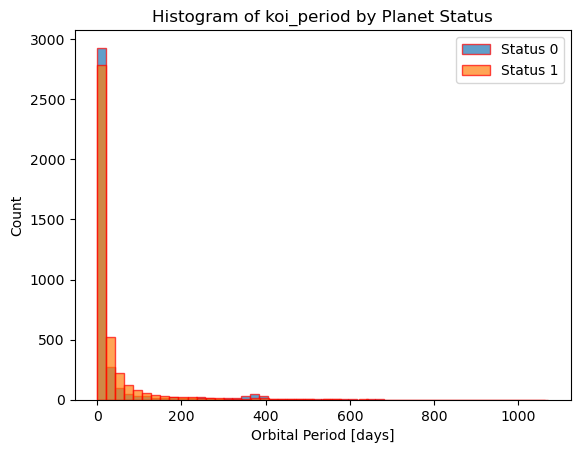

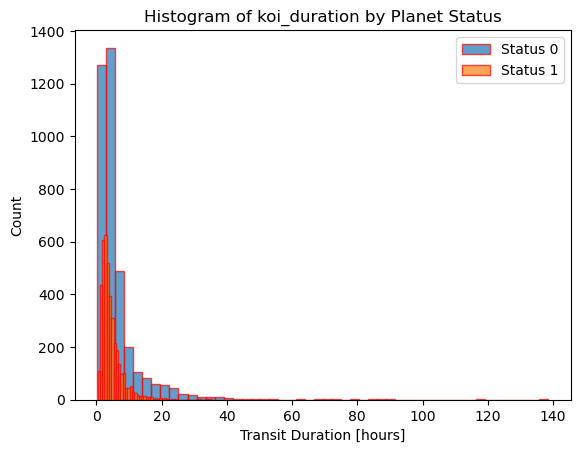

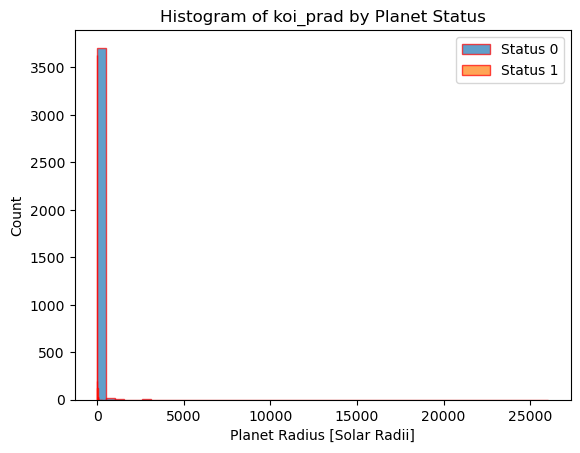

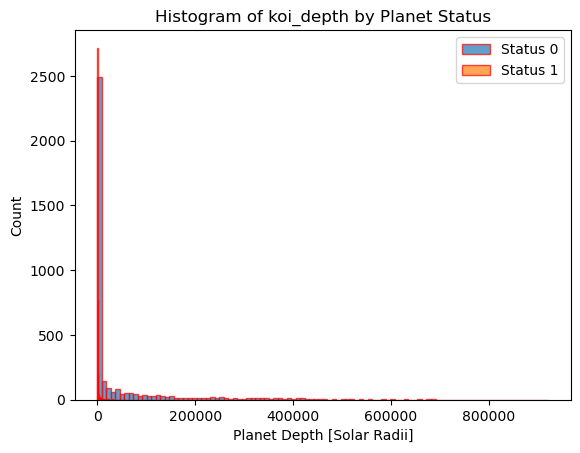

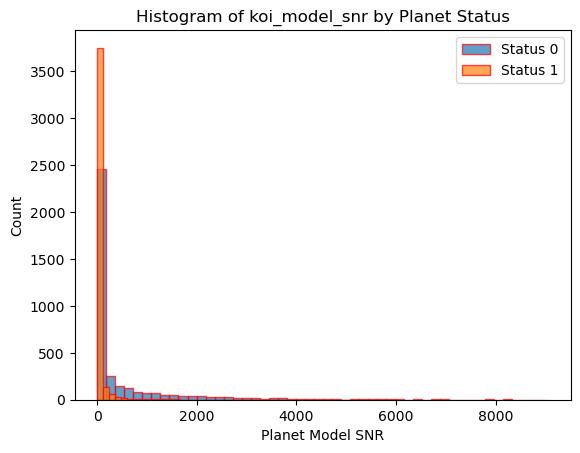

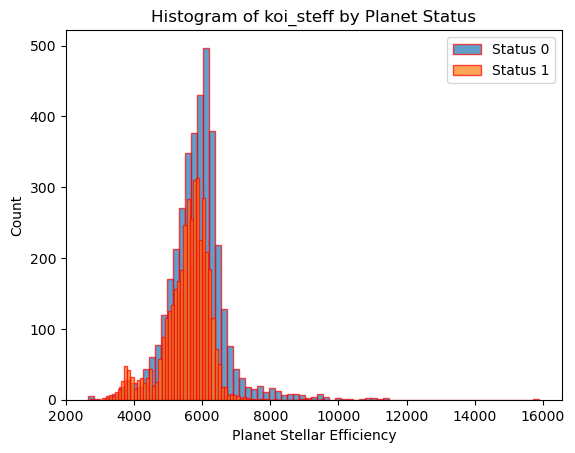

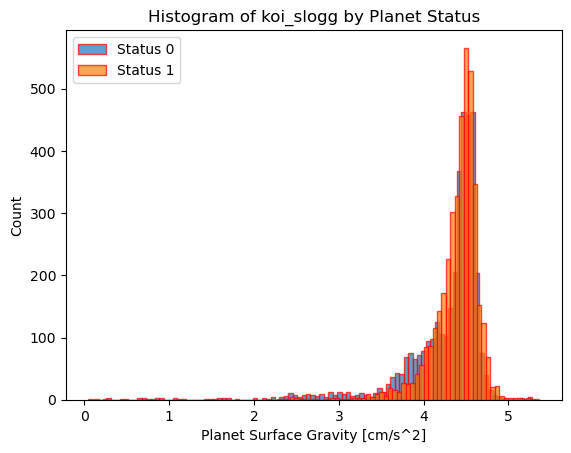

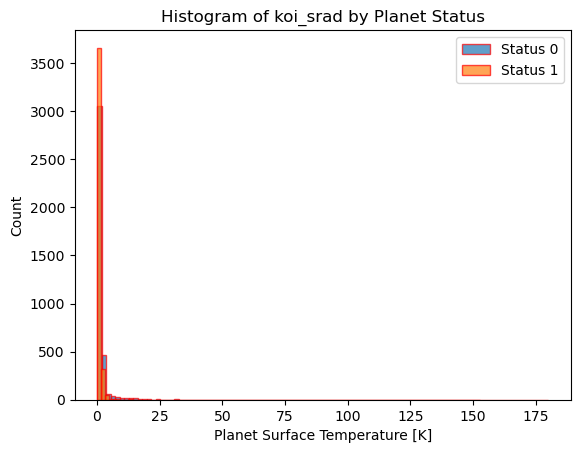

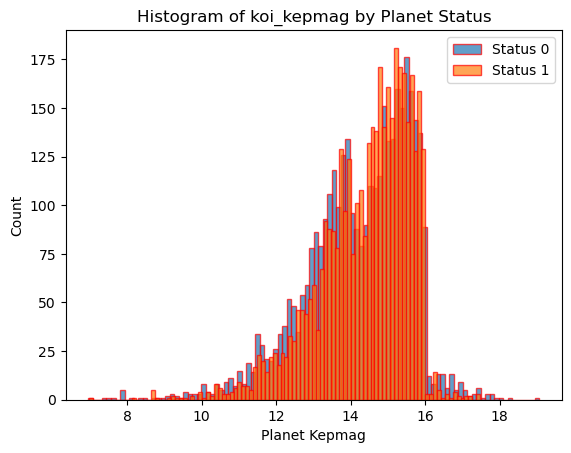

In [893]:
# start by creating figure
plt.figure(facecolor='white', edgecolor='black')

# Group data by Planet Status
for status in [0, 1]:
    # Planet periods by status
    status_data = exoplanets_1_clean[exoplanets_1_clean["Planet Status"] == status]

    # koi periods
    periods = status_data["koi_period"]
    plt.hist(periods, bins=50, edgecolor="red", alpha=0.7, label=f"Status {status}")
    plt.xlabel("Orbital Period [days]")
    plt.ylabel("Count")
    plt.title("Histogram of koi_period by Planet Status")
plt.legend()
plt.show()

# koi duration distributions 
plt.figure(facecolor='white', edgecolor='black')
for status in [0, 1]:
    status_data = exoplanets_1_clean[exoplanets_1_clean["Planet Status"] == status]
    durations = status_data["koi_duration"]
    plt.hist(durations, bins=50, edgecolor="red", alpha=0.7, label=f"Status {status}")
plt.xlabel("Transit Duration [hours]")
plt.ylabel("Count")
plt.title("Histogram of koi_duration by Planet Status")
plt.legend()
plt.show()

# koi prad distributions
plt.figure(facecolor='white', edgecolor='black')
for status in [0, 1]:
    status_data = exoplanets_1_clean[exoplanets_1_clean["Planet Status"] == status]
    prads = status_data["koi_prad"]
    plt.hist(prads, bins=50, edgecolor="red", alpha=0.7, label=f"Status {status}")
plt.xlabel("Planet Radius [Solar Radii]")
plt.ylabel("Count")
plt.title("Histogram of koi_prad by Planet Status")
plt.legend()
plt.show()

# koi depth
plt.figure(facecolor='white', edgecolor='black')
for status in [0, 1]:
    status_data = exoplanets_1_clean[exoplanets_1_clean["Planet Status"] == status]
    depths = status_data["koi_depth"]
    plt.hist(depths, bins=100, edgecolor="red", alpha=0.7, label=f"Status {status}")
plt.xlabel("Planet Depth [Solar Radii]")
plt.ylabel("Count")
plt.title("Histogram of koi_depth by Planet Status")
plt.legend()
plt.show()

# koi model snr
plt.figure(facecolor='white', edgecolor='black')
for status in [0, 1]:
    status_data = exoplanets_1_clean[exoplanets_1_clean["Planet Status"] == status]
    model_snrs = status_data["koi_model_snr"]
    plt.hist(model_snrs, bins=50, edgecolor="red", alpha=0.7, label=f"Status {status}")
plt.xlabel("Planet Model SNR")
plt.ylabel("Count")
plt.title("Histogram of koi_model_snr by Planet Status")
plt.legend()
plt.show()

# koi steff
plt.figure(facecolor='white', edgecolor='black')
for status in [0, 1]:
    status_data = exoplanets_1_clean[exoplanets_1_clean["Planet Status"] == status]
    steffs = status_data["koi_steff"]
    plt.hist(steffs, bins=75, edgecolor="red", alpha=0.7, label=f"Status {status}")
plt.xlabel("Planet Stellar Efficiency")
plt.ylabel("Count")
plt.title("Histogram of koi_steff by Planet Status")
plt.legend()
plt.show()

# koi slogg
plt.figure(facecolor='white', edgecolor='black')
for status in [0, 1]:
    status_data = exoplanets_1_clean[exoplanets_1_clean["Planet Status"] == status]
    sloggs = status_data["koi_slogg"]
    plt.hist(sloggs, bins=100, edgecolor="red", alpha=0.7, label=f"Status {status}")
plt.xlabel("Planet Surface Gravity [cm/s^2]")
plt.ylabel("Count")
plt.title("Histogram of koi_slogg by Planet Status")
plt.legend()
plt.show()

# koi srad
plt.figure(facecolor='white', edgecolor='black')
for status in [0, 1]:
    status_data = exoplanets_1_clean[exoplanets_1_clean["Planet Status"] == status]
    srads = status_data["koi_srad"]
    plt.hist(srads, bins=100, edgecolor="red", alpha=0.7, label=f"Status {status}")
plt.xlabel("Planet Surface Temperature [K]")
plt.ylabel("Count")
plt.title("Histogram of koi_srad by Planet Status")
plt.legend()
plt.show()

# koi kepmag
plt.figure(facecolor='white', edgecolor='black')
for status in [0, 1]:
    status_data = exoplanets_1_clean[exoplanets_1_clean["Planet Status"] == status]
    kepmags = status_data["koi_kepmag"]
    plt.hist(kepmags, bins=100, edgecolor="red", alpha=0.7, label=f"Status {status}")
plt.xlabel("Planet Kepmag")
plt.ylabel("Count")
plt.title("Histogram of koi_kepmag by Planet Status")
plt.legend()
plt.show()
